Import libraries

In [1]:
import numpy as np
import pandas as pd

import itertools

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

Read csv file

In [2]:
df = pd.read_csv("../data/student/student-mat-categorized.csv")

header = list(df)

Convert text to dummy variables

In [3]:
original = []
for attr in header:
    counts = df[attr].value_counts()
    original.append(counts.index.tolist())
    
    for i in range(len(df)):
        value = df.get_value(i, attr)
        new = counts.index.tolist().index(value)
        df.set_value(i, attr, new)

To plot confusion matrix

In [4]:
def rearrangeMatrix(matrix):
    matrix[:,[0, 1, 2, 3, 4]] = matrix[:,[3, 4, 0, 1, 2]]
    matrix[[0, 1, 2, 3, 4], :] = matrix[[3, 4, 0, 1, 2], :]

def plot_confusion_matrix(cm, classes=np.arange(5), title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Print and plot the confusion matrix. Normalization can be applied by setting `normalize=True`.
    """
    
    rearrangeMatrix(cm)
    
    fig = plt.figure(figsize=(12, 6))
    
    tick_marks = np.arange(len(classes))
    
    """
    Without Normalization
    """
    
    ax1 = fig.add_subplot(121)
    
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax1.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(im, cax = cax, orientation='vertical')
    
    ax1.set_title(title + ", without normalization")
    ax1.set_xticks(np.arange(len(classes)))
    ax1.set_xticklabels(classes)
    ax1.set_yticks(np.arange(len(classes)))
    ax1.set_yticklabels(classes)
    np.set_printoptions(precision=2)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        val = cm[i, j]
        ax1.annotate(val, xy=(j, i), ha="center", color="white" if val > thresh else "black")
        
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    
   
    """
    With Normalization
    """

    ax2 = fig.add_subplot(122)
    
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    im = ax2.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(im, cax = cax, orientation='vertical')
    
    ax2.set_title(title + ", with normalization")
    ax2.set_xticks(np.arange(len(classes)))
    ax2.set_xticklabels(classes)
    ax2.set_yticks(np.arange(len(classes)))
    ax2.set_yticklabels(classes)
    np.set_printoptions(precision=2)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        val = round(cm[i, j], 2)
        ax2.annotate(val, xy=(j, i), ha="center", color="white" if val > thresh else "black")
        
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')
    
    plt.tight_layout()
    plt.show()

y data, always same

In [5]:
y = pd.DataFrame.copy(df.iloc[:, -1])

No test scores

In [6]:
X = pd.DataFrame.copy(df.iloc[:, :-3])

svmc = svm.SVC(kernel='linear', C=0.01)
scores = cross_val_score(svmc, X, y, cv=5, scoring='accuracy')
scores

array([ 0.43209877,  0.40740741,  0.41772152,  0.41558442,  0.41558442])

In [7]:
scores.mean()

0.41767930459913583

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4)

svmc.fit(X_train, y_train) 
pred = svmc.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.41139240506329117

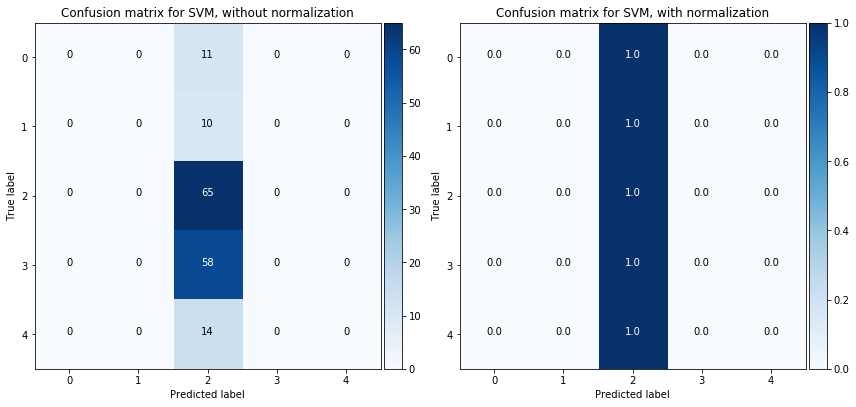

In [9]:
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix for SVM')

Both test scores

In [10]:
X = pd.DataFrame.copy(df.iloc[:, :-1])

svmc = svm.SVC(kernel='linear', C=0.01)
scores = cross_val_score(svmc, X, y, cv=5, scoring='accuracy')
scores

array([ 0.6 ,  0.58,  0.59,  0.7 ,  0.53])

In [11]:
scores.mean()

0.60277762556243564

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.4)

svmc.fit(X_train, y_train) 
pred = svmc.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.50632911392405067

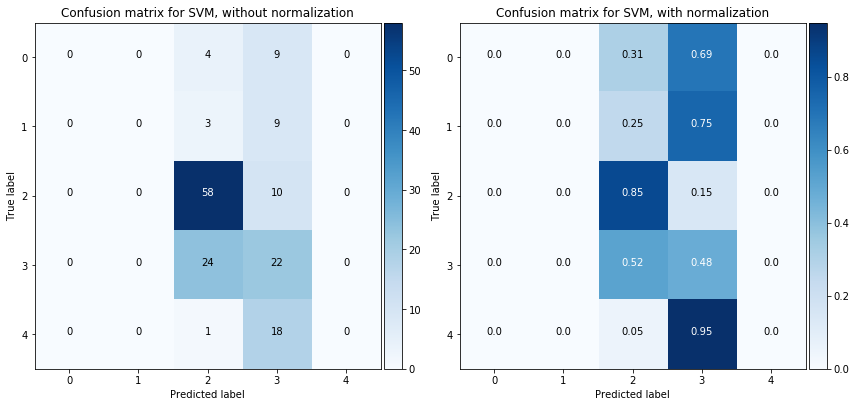

In [13]:
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix for SVM')